## CLICC Concurrent Software Usage Project
### To see if we run the risk of having more people wanting to use the software than our licenses allow. 
#### By Julia Wood

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### Got the counts of computers at each location from labstats.

In [167]:
TotalDesktops = pd.DataFrame({'Location':  ['Arts Lending', 'Arts Satellites',
                                           'Biomed Satellites', 'Classroom C',
                                           'CLICC Mainlab', 'MacBook Pros (2015)',
                                           'Music Satellites', 'SEL Boelter Satellites',
                                           'SEL Geology Satellites', 'YRL Satellites'], 
                              'Count' :  [5, 7, 16, 1, 112, 518, 14, 14, 4, 24 ]})

TotalDesktops

sum(TotalDesktops['Count'])

715

#### These are the 5 softwares we chose to focus on because they were the most frequently used licensed softwares.

In [168]:
softwares5 = ['Adobe Acrobat DC Pro 2015', 
                'Adobe CS6 Master Collection - Photoshop Extended',
                'IBM SPSS Statistics Professional (Win)', 
                'Microsoft Office 2016 Professional Plus - Word', 
                'Arc GIS Suite']
softwares5

['Adobe Acrobat DC Pro 2015',
 'Adobe CS6 Master Collection - Photoshop Extended',
 'IBM SPSS Statistics Professional (Win)',
 'Microsoft Office 2016 Professional Plus - Word',
 'Arc GIS Suite']

### Just loading in the data, that I drew from labstats. All of this data is from spring quarter 2019. 

In [169]:
dfs = []

In [170]:
def process_acrobat_file(csv):
    df = pd.read_csv(csv)
    df.columns = ['Time', 'Percent Usage']
    df["Time"] = pd.to_datetime(df["Time"])
    df["Software"] = np.repeat('Adobe Acrobat DC Pro 2015', df.shape[0])
    df = df.set_index('Time')
    return df


In [171]:
dfs.append(process_acrobat_file("Application Usage History.xlsx - Application Usage History.csv"))
dfs.append(process_acrobat_file("Application Usage History (5).xlsx - Application Usage History.csv"))
dfs.append(process_acrobat_file("Application Usage History (10).xlsx - Application Usage History.csv"))
dfs.append(process_acrobat_file("Application Usage History (15).xlsx - Application Usage History.csv"))

In [172]:
def process_photoshop_file(csv):
    df = pd.read_csv(csv)
    df.columns = ['Time', 'Percent Usage']
    df["Time"] = pd.to_datetime(df["Time"])
    df["Software"] = np.repeat('Adobe CS6 Master Collection - Photoshop Extended', df.shape[0])
    df = df.set_index('Time')
    return df


In [173]:
dfs.append(process_photoshop_file("Application Usage History (1).xlsx - Application Usage History.csv"))
dfs.append(process_photoshop_file("Application Usage History (6).xlsx - Application Usage History.csv"))
dfs.append(process_photoshop_file("Application Usage History (11).xlsx - Application Usage History.csv"))
dfs.append(process_photoshop_file("Application Usage History (16).xlsx - Application Usage History.csv"))


In [174]:
def process_SPSS_file(csv):
    df = pd.read_csv(csv)
    df.columns = ['Time', 'Percent Usage']
    df["Time"] = pd.to_datetime(df["Time"])
    df["Software"] = np.repeat('IBM SPSS Statistics Professional (Win)', df.shape[0])
    df = df.set_index('Time')
    return df


In [175]:
dfs.append(process_SPSS_file("Application Usage History (2).xlsx - Application Usage History.csv"))
dfs.append(process_SPSS_file("Application Usage History (7).xlsx - Application Usage History.csv"))
dfs.append(process_SPSS_file("Application Usage History (12).xlsx - Application Usage History.csv"))
dfs.append(process_SPSS_file("Application Usage History (17).xlsx - Application Usage History.csv"))



In [176]:
def process_Word_file(csv):
    df = pd.read_csv(csv)
    df.columns = ['Time', 'Percent Usage']
    df["Time"] = pd.to_datetime(df["Time"])
    df["Software"] = np.repeat('Microsoft Office 2016 Professional Plus - Word', df.shape[0])
    df = df.set_index('Time')
    return df


In [177]:
dfs.append(process_Word_file("Application Usage History (3).xlsx - Application Usage History.csv"))
dfs.append(process_Word_file("Application Usage History (8).xlsx - Application Usage History.csv"))
dfs.append(process_Word_file("Application Usage History (13).xlsx - Application Usage History.csv"))
dfs.append(process_Word_file("Application Usage History (18).xlsx - Application Usage History.csv"))

In [178]:
def process_ArcGIS_file(csv):
    df = pd.read_csv(csv)
    df.columns = ['Time', 'Percent Usage']
    df["Time"] = pd.to_datetime(df["Time"])
    df["Software"] = np.repeat('Arc GIS Suite', df.shape[0])
    df = df.set_index('Time')
    return df


In [179]:
dfs.append(process_ArcGIS_file("Application Usage History (4).xlsx - Application Usage History.csv"))
dfs.append(process_ArcGIS_file("Application Usage History (9).xlsx - Application Usage History.csv"))
dfs.append(process_ArcGIS_file("Application Usage History (14).xlsx - Application Usage History.csv"))
dfs.append(process_ArcGIS_file("Application Usage History (19).xlsx - Application Usage History.csv"))

### Combining all the individual data sets into one data frame. 

In [180]:
df = pd.concat(dfs)

In [181]:
df =  df.reset_index()

In [182]:
df

,Time,Percent Usage,Software
0,2019-05-17 00:00:00,0.0,Adobe Acrobat DC Pro 2015
1,2019-05-17 01:00:00,0.0,Adobe Acrobat DC Pro 2015
2,2019-05-17 02:00:00,0.0,Adobe Acrobat DC Pro 2015
3,2019-05-17 03:00:00,0.0,Adobe Acrobat DC Pro 2015
4,2019-05-17 04:00:00,0.0,Adobe Acrobat DC Pro 2015
...,...,...,...
3355,2019-06-13 19:00:00,0.0,Arc GIS Suite
3356,2019-06-13 20:00:00,0.0,Arc GIS Suite
3357,2019-06-13 21:00:00,0.0,Arc GIS Suite
3358,2019-06-13 22:00:00,0.0,Arc GIS Suite


### Adding a column that calculates the number of concurrent software being run by multiplying the percent usage by the total number of desktops that CLICC has around campus

In [183]:
df["# of Softwares in Use"] = df['Percent Usage'] * 715

In [184]:
df.head()

,Time,Percent Usage,Software,# of Softwares in Use
0,2019-05-17 00:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0
1,2019-05-17 01:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0
2,2019-05-17 02:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0
3,2019-05-17 03:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0
4,2019-05-17 04:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0


In [185]:
df['Day_of_Week'] = df['Time'].dt.day_name()
df

,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week
0,2019-05-17 00:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday
1,2019-05-17 01:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday
2,2019-05-17 02:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday
3,2019-05-17 03:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday
4,2019-05-17 04:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday
...,...,...,...,...,...
3355,2019-06-13 19:00:00,0.0,Arc GIS Suite,0.0,Thursday
3356,2019-06-13 20:00:00,0.0,Arc GIS Suite,0.0,Thursday
3357,2019-06-13 21:00:00,0.0,Arc GIS Suite,0.0,Thursday
3358,2019-06-13 22:00:00,0.0,Arc GIS Suite,0.0,Thursday


In [186]:
df["Hour"] = df["Time"].dt.hour
df


,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week,Hour
0,2019-05-17 00:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,0
1,2019-05-17 01:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,1
2,2019-05-17 02:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,2
3,2019-05-17 03:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,3
4,2019-05-17 04:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,4
...,...,...,...,...,...,...
3355,2019-06-13 19:00:00,0.0,Arc GIS Suite,0.0,Thursday,19
3356,2019-06-13 20:00:00,0.0,Arc GIS Suite,0.0,Thursday,20
3357,2019-06-13 21:00:00,0.0,Arc GIS Suite,0.0,Thursday,21
3358,2019-06-13 22:00:00,0.0,Arc GIS Suite,0.0,Thursday,22


In [187]:
df.head(30)

,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week,Hour
0,2019-05-17 00:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,0
1,2019-05-17 01:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,1
2,2019-05-17 02:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,2
3,2019-05-17 03:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,3
4,2019-05-17 04:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,4
5,2019-05-17 05:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,5
6,2019-05-17 06:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,6
7,2019-05-17 07:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,7
8,2019-05-17 08:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,8
9,2019-05-17 09:00:00,0.000000,Adobe Acrobat DC Pro 2015,0.000000,Friday,9


In [188]:
max(df['# of Softwares in Use'])

1624.2947462881384

In [189]:
df.sort_values('# of Softwares in Use', ascending = False)

,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week,Hour
2630,2019-06-11 14:00:00,2.271741,Microsoft Office 2016 Professional Plus - Word,1624.294746,Tuesday,14
2462,2019-06-04 14:00:00,2.200767,Microsoft Office 2016 Professional Plus - Word,1573.548295,Tuesday,14
2609,2019-06-10 17:00:00,2.181106,Microsoft Office 2016 Professional Plus - Word,1559.490945,Monday,17
2606,2019-06-10 14:00:00,2.172010,Microsoft Office 2016 Professional Plus - Word,1552.987233,Monday,14
2607,2019-06-10 15:00:00,2.167523,Microsoft Office 2016 Professional Plus - Word,1549.779124,Monday,15
...,...,...,...,...,...,...
1524,2019-05-24 12:00:00,0.000000,IBM SPSS Statistics Professional (Win),0.000000,Friday,12
1525,2019-05-24 13:00:00,0.000000,IBM SPSS Statistics Professional (Win),0.000000,Friday,13
1526,2019-05-24 14:00:00,0.000000,IBM SPSS Statistics Professional (Win),0.000000,Friday,14
1527,2019-05-24 15:00:00,0.000000,IBM SPSS Statistics Professional (Win),0.000000,Friday,15


### This shows us that Word is our most used software out of these 5 (which makes sense). So we need to make sure our license allows for at least 1623 concurrent users.

In [112]:
df.head()

,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week,Hour
0,2019-05-17 00:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,0
1,2019-05-17 01:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,1
2,2019-05-17 02:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,2
3,2019-05-17 03:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,3
4,2019-05-17 04:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,4


In [113]:
df.to_csv('May17Jun13SoftwareUsage.csv')

### Now I split up each software into its own data frame and (1) visualize on average how many people are using that software at every hour in the day and (2) rank the busiest days of the week for each software. 



### Up first is Adobe Acrobat DC Pro 2015

In [197]:
acrobat = df[df['Software']  == 'Adobe Acrobat DC Pro 2015']
acrobat.head()

,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week,Hour
0,2019-05-17 00:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,0
1,2019-05-17 01:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,1
2,2019-05-17 02:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,2
3,2019-05-17 03:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,3
4,2019-05-17 04:00:00,0.0,Adobe Acrobat DC Pro 2015,0.0,Friday,4


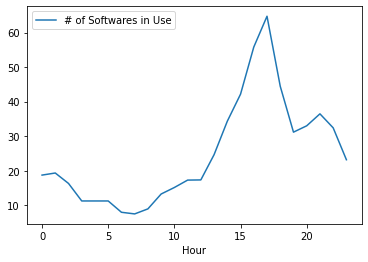

In [198]:
acrobat.groupby('Hour').mean().plot(y = '# of Softwares in Use')

In [199]:
acrobat.groupby('Day_of_Week').mean().sort_values('# of Softwares in Use').drop(columns = "Hour")

,Percent Usage,# of Softwares in Use
Day_of_Week,,
Monday,0.020337,14.540693
Sunday,0.024533,17.541004
Tuesday,0.033102,23.668006
Wednesday,0.033224,23.755500
Thursday,0.041344,29.561084
Saturday,0.045538,32.559876
Friday,0.045868,32.795319


### Now Adobe CS6 Master Collection - Photoshop Extended

In [200]:
photoshop = df[df['Software']  == 'Adobe CS6 Master Collection - Photoshop Extended']
photoshop.head()

,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week,Hour
672,2019-05-17 00:00:00,0.146843,Adobe CS6 Master Collection - Photoshop Extended,104.992658,Friday,0
673,2019-05-17 01:00:00,0.146843,Adobe CS6 Master Collection - Photoshop Extended,104.992658,Friday,1
674,2019-05-17 02:00:00,0.059594,Adobe CS6 Master Collection - Photoshop Extended,42.609520,Friday,2
675,2019-05-17 03:00:00,0.000000,Adobe CS6 Master Collection - Photoshop Extended,0.000000,Friday,3
676,2019-05-17 04:00:00,0.000000,Adobe CS6 Master Collection - Photoshop Extended,0.000000,Friday,4


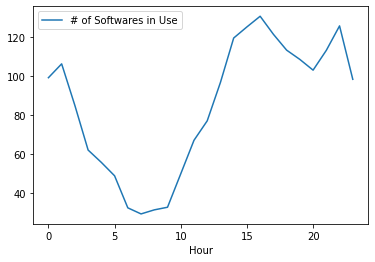

In [201]:
photoshop.groupby('Hour').mean().plot(y = '# of Softwares in Use')

In [202]:
photoshop.groupby('Day_of_Week').mean().sort_values('# of Softwares in Use').drop(columns = "Hour")

,Percent Usage,# of Softwares in Use
Day_of_Week,,
Saturday,0.075283,53.827573
Tuesday,0.091069,65.114283
Friday,0.104095,74.428129
Sunday,0.115654,82.692959
Thursday,0.130274,93.146047
Wednesday,0.140466,100.432951
Monday,0.173459,124.023185


### Now IBM SPSS Statistics Professional (Win)

In [203]:
spss = df[df['Software']  == 'IBM SPSS Statistics Professional (Win)']
spss.head()

,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week,Hour
1344,2019-05-17 00:00:00,0.0,IBM SPSS Statistics Professional (Win),0.0,Friday,0
1345,2019-05-17 01:00:00,0.0,IBM SPSS Statistics Professional (Win),0.0,Friday,1
1346,2019-05-17 02:00:00,0.0,IBM SPSS Statistics Professional (Win),0.0,Friday,2
1347,2019-05-17 03:00:00,0.0,IBM SPSS Statistics Professional (Win),0.0,Friday,3
1348,2019-05-17 04:00:00,0.0,IBM SPSS Statistics Professional (Win),0.0,Friday,4


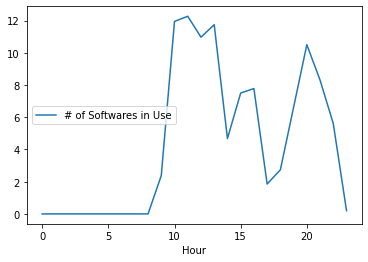

In [204]:
spss.groupby('Hour').mean().plot(y = '# of Softwares in Use')

In [205]:
spss.groupby('Day_of_Week').mean().sort_values('# of Softwares in Use').drop(columns = "Hour")

,Percent Usage,# of Softwares in Use
Day_of_Week,,
Sunday,0.000391,0.279798
Tuesday,0.002160,1.544206
Saturday,0.005705,4.078795
Thursday,0.006770,4.840417
Friday,0.007351,5.256013
Monday,0.009795,7.003460
Wednesday,0.010684,7.639006


### Now Microsoft Office 2016 Professional Plus - Word	

In [206]:
word = df[df['Software']  == 'Microsoft Office 2016 Professional Plus - Word']
word.head()

,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week,Hour
2016,2019-05-17 00:00:00,0.189264,Microsoft Office 2016 Professional Plus - Word,135.323870,Friday,0
2017,2019-05-17 01:00:00,0.158060,Microsoft Office 2016 Professional Plus - Word,113.012930,Friday,1
2018,2019-05-17 02:00:00,0.550212,Microsoft Office 2016 Professional Plus - Word,393.401656,Friday,2
2019,2019-05-17 03:00:00,0.404838,Microsoft Office 2016 Professional Plus - Word,289.458925,Friday,3
2020,2019-05-17 04:00:00,0.146843,Microsoft Office 2016 Professional Plus - Word,104.992658,Friday,4


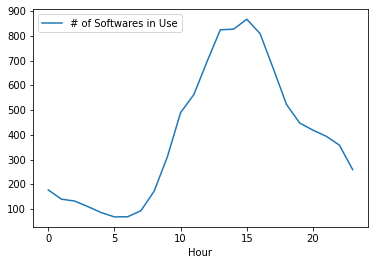

In [207]:
word.groupby('Hour').mean().plot(y = '# of Softwares in Use')

In [208]:
word.groupby('Day_of_Week').mean().sort_values('# of Softwares in Use').drop(columns = "Hour")

,Percent Usage,# of Softwares in Use
Day_of_Week,,
Saturday,0.216056,154.480169
Sunday,0.275843,197.227614
Friday,0.547681,391.591930
Monday,0.664734,475.284689
Thursday,0.697029,498.375478
Wednesday,0.706762,505.334584
Tuesday,0.770106,550.625731


### Now Arc GIS Suite

In [209]:
arcgis = df[df['Software']  == 'Arc GIS Suite']
arcgis.head()

,Time,Percent Usage,Software,# of Softwares in Use,Day_of_Week,Hour
2688,2019-05-17 00:00:00,0.0,Arc GIS Suite,0.0,Friday,0
2689,2019-05-17 01:00:00,0.0,Arc GIS Suite,0.0,Friday,1
2690,2019-05-17 02:00:00,0.0,Arc GIS Suite,0.0,Friday,2
2691,2019-05-17 03:00:00,0.0,Arc GIS Suite,0.0,Friday,3
2692,2019-05-17 04:00:00,0.0,Arc GIS Suite,0.0,Friday,4


In [210]:
arcgis.groupby('Hour').mean().sort_values('# of Softwares in Use', ascending = False)

,Percent Usage,# of Softwares in Use
Hour,,
15,0.055884,39.957362
16,0.048119,34.405407
14,0.044388,31.737624
13,0.037215,26.608816
17,0.034326,24.543075
18,0.030781,22.008357
19,0.026953,19.271309
12,0.022917,16.385313
11,0.016068,11.488520


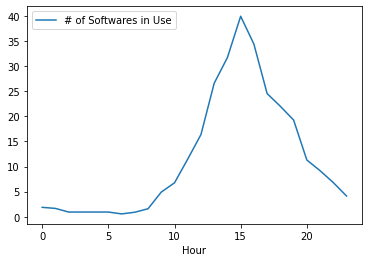

In [156]:
arcgis.groupby('Hour').mean().plot(y = '# of Softwares in Use')

In [151]:
arcgis.groupby('Day_of_Week').mean().sort_values('# of Softwares in Use')

,Percent Usage,# of Softwares in Use,Hour
Day_of_Week,,,
Sunday,0.011141,7.965893,11.5
Thursday,0.011600,8.293767,11.5
Saturday,0.011775,8.419311,11.5
Wednesday,0.017318,12.382435,11.5
Monday,0.017878,12.782917,11.5
Friday,0.020395,14.582086,11.5
Tuesday,0.024049,17.194750,11.5


### Finally, this is the maximum softwares being concurrently run for each of the 5 softwares. 

In [212]:
print (max(acrobat['# of Softwares in Use']), max(photoshop['# of Softwares in Use']),
      max(spss['# of Softwares in Use']), max(word['# of Softwares in Use']),
      max(arcgis['# of Softwares in Use']))

313.31558981889384 404.600872899331 122.43310491107847 1624.2947462881384 149.62182860172948


### So we need to make sure our contract for Acrobat allows at least 314 concurrent users, Photoshop allows at least 405 concurrent users, SPSS allows 123 concurrent users, Word allows at least 1625 concurrent users, and Arc GIS Suite allows at least 150 concurrent users. 

### My Tableau Public Profile is here: https://public.tableau.com/profile/julia2053#!/
### Only the most recent visualization is related to this project. It is titled "CLICC Concurrent Software Usage Spring 2019"

# Let me know what else you want me to look more into about software usage and I will do it!